In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv')
df.head(11)

,rank,Youtuber,subscribers,video_views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ııı Kids Diana Show,112000000,93247040539,People & Blogs,ııı Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [3]:
df.shape

(995, 28)

In [4]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

### Data Cleaning

In [5]:
#Drop rows with missing values in the 'Country' column 'cause qualitative type columns should not be replaced with random values
df = df.dropna(subset=['Country'])

In [6]:
#Fill NaN values in the 'category' column with matching 'channel_type' values
df['category'] = df.apply(lambda row: row['channel_type'] if pd.isna(row['category']) else row['category'], axis=1)

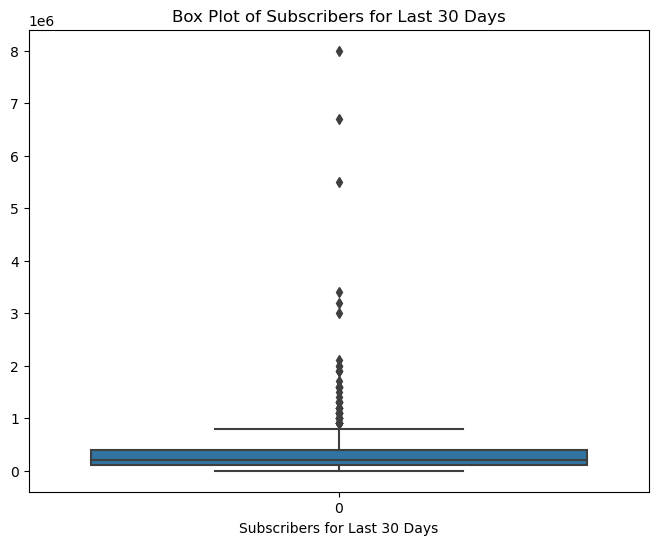

In [7]:
# Calculate and display statistics for the 'subscribers_for_last_30_days' column
sub = df['subscribers_for_last_30_days'].describe()

#box plot to analyze it
plt.figure(figsize=(8, 6))
sns.boxplot(df["subscribers_for_last_30_days"])
plt.title("Box Plot of Subscribers for Last 30 Days")
plt.xlabel("Subscribers for Last 30 Days")
plt.show()


#Calculate the median for 'subscribers_for_last_30_days' and fill NaN values with it 'cause outliers exist'
median_subscribers = df['subscribers_for_last_30_days'].median()
df['subscribers_for_last_30_days'].fillna(median_subscribers, inplace=True)

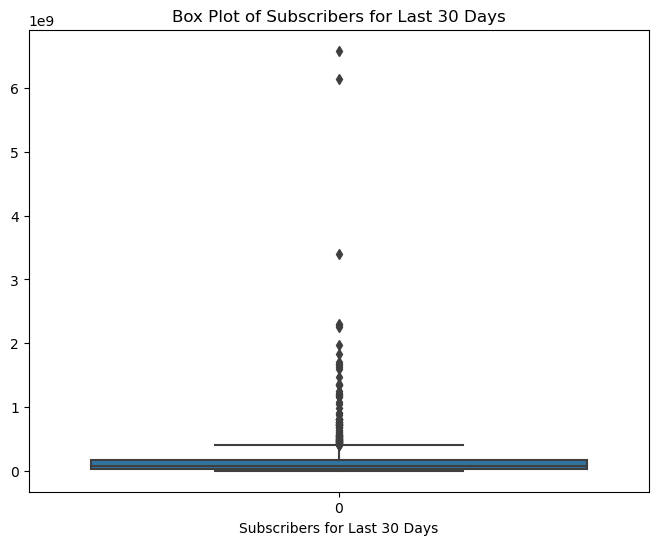

In [8]:
# Calculate and display statistics for the 'video_views_for_the_last_30_days' column
view = df['video_views_for_the_last_30_days'].describe()

#box plot to analyze it
plt.figure(figsize=(8, 6))
sns.boxplot(df["video_views_for_the_last_30_days"])
plt.title("Box Plot of Subscribers for Last 30 Days")
plt.xlabel("Subscribers for Last 30 Days")
plt.show()

#Calculate the median for 'subscribers_for_last_30_days' and fill NaN values with it 'cause outliers exist'
median_video_views = df['video_views_for_the_last_30_days'].median()
df['video_views_for_the_last_30_days'].fillna(median_video_views, inplace=True)

In [9]:
#alternative method to filling missing values in the 'channel_type' column directly with values from the 'category' column.
df['channel_type'] = df['channel_type'].fillna(df['category'])

In [10]:
# Drop the 'channel_type_rank' column as it is not useful
df = df.drop('channel_type_rank', axis=1)

In [11]:
# Find rows with missing values in specific columns and drop them
long = df[df['Longitude'].isna()]
contry = df[df['country_rank'].isna()]
video = df[df['video_views_rank'].isna()]
create = df[df['created_year'].isna()]
df = df.drop([663, 735, 508,762])

In [12]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video_views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tertiary education enrollment (%)    0
Population

### Converting dataframe into csv file for dasboard

In [13]:
df.to_csv('Yotube_cleaned_data.csv', index=False)

### Data analysis through matplotlib and seaborn

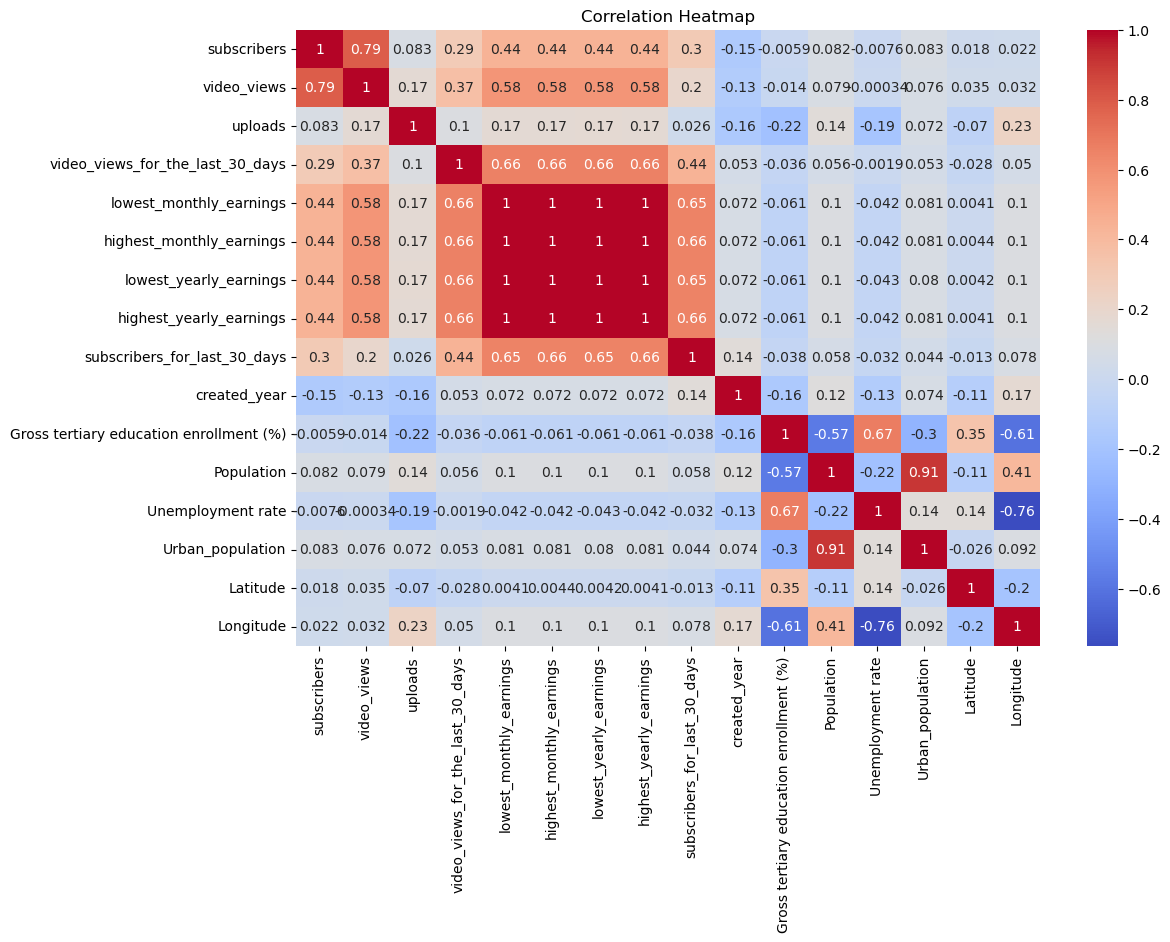

In [14]:
numeric_columns = ['subscribers', 'video_views', 'uploads', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year',
                   'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate',
                   'Urban_population', 'Latitude', 'Longitude']

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

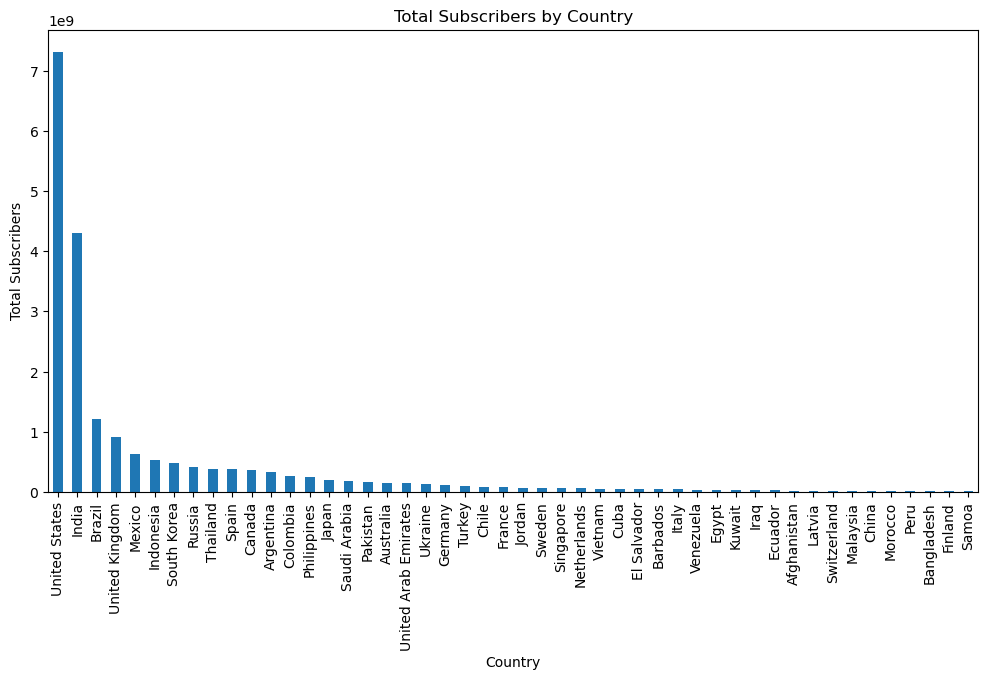

In [15]:
country_subscribers = df.groupby('Country')['subscribers'].sum()

# Sort the countries in descending order
sorted_country_subscribers = country_subscribers.sort_values(ascending=False)

# Plot the data with increased x-axis length and sorted countries
plt.figure(figsize=(12, 6))  # Adjust the figure size
sorted_country_subscribers.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

The USA dominates with the highest subscribers, leaving India, Brazil, and the United Kingdom.

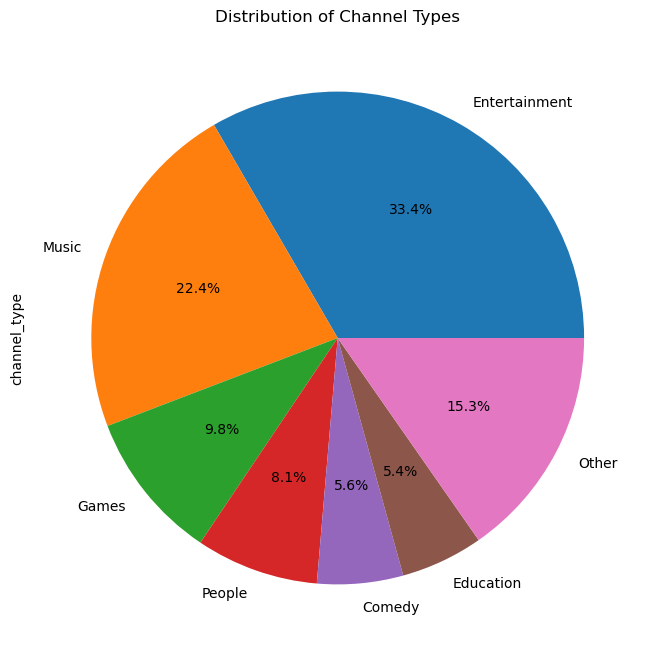

In [16]:
plt.figure(figsize=(8, 8))
channel_type_distribution = df['channel_type'].value_counts()

threshold = 0.05 
small_categories = channel_type_distribution[channel_type_distribution / channel_type_distribution.sum() < threshold]
major_categories = channel_type_distribution[channel_type_distribution / channel_type_distribution.sum() >= threshold]
other_count = small_categories.sum()
major_categories['Other'] = other_count

# Plot the pie chart
major_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Channel Types')
plt.show()

2023's YouTube landscape is ruled by Entertainment, commanding a third of all channel types, closely trailed by Music.

<Figure size 1000x600 with 0 Axes>

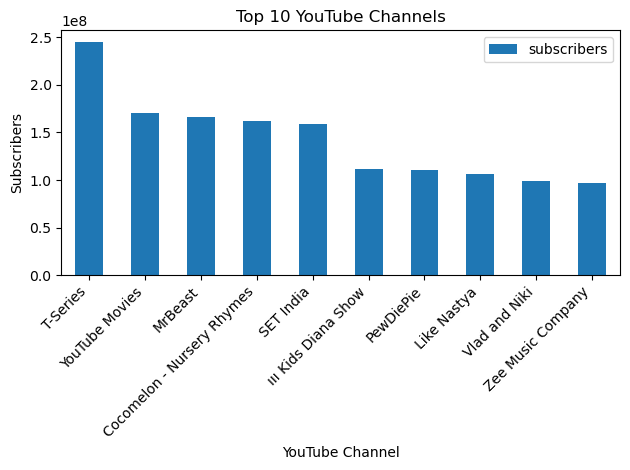

In [17]:
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
top_10_channels = df.nlargest(10, 'subscribers')
bar_plot = top_10_channels.plot(kind='bar', x='Youtuber', y='subscribers')
plt.xlabel('YouTube Channel')
plt.ylabel('Subscribers')
plt.title('Top 10 YouTube Channels')
plt.xticks(rotation=45, ha='right')  # Rotate and adjust alignment of x-axis labels
plt.tight_layout()  # Ensures that all elements fit within the plot area
plt.show()


Just top 10 youtube channels

C:\Users\shiva\AppData\Local\Temp\ipykernel_11644\143379709.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Avg Education Enrollment', y='Country', hue='Most Watched Channel Type', palette='Set1', dodge=False, ci=None)


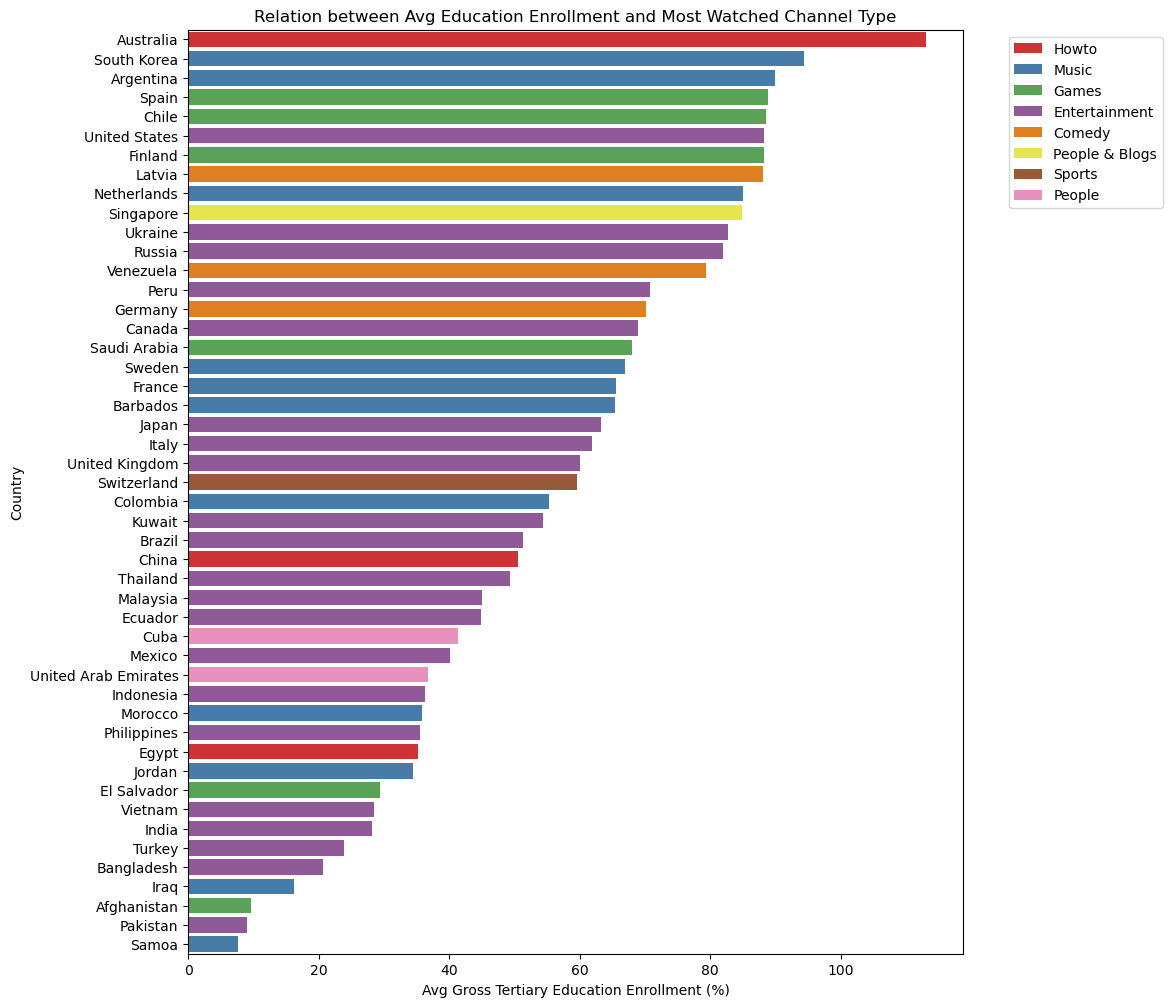

In [18]:
plt.figure(figsize=(10, 12))  # Adjust the figsize as needed
country_avg_education = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean()

most_watched_channel_types = df.groupby('Country')['channel_type'].apply(lambda x: x.value_counts().idxmax())

data = pd.DataFrame({'Country': country_avg_education.index, 'Avg Education Enrollment': country_avg_education.values, 'Most Watched Channel Type': most_watched_channel_types.values})

# Sort the data in descending order of education enrollment
data = data.sort_values(by='Avg Education Enrollment', ascending=False)

sns.barplot(data=data, x='Avg Education Enrollment', y='Country', hue='Most Watched Channel Type', palette='Set1', dodge=False, ci=None)
plt.xlabel('Avg Gross Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.title('Relation between Avg Education Enrollment and Most Watched Channel Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()



Type of channel country watches with respect to their Avg education Enrollment. Australia being having the highest avg Education enrolled watch Howto where as for top 10 there was Music and Games, which shows that irrespective of having entertainment as the hightype of channel in youtube there is  

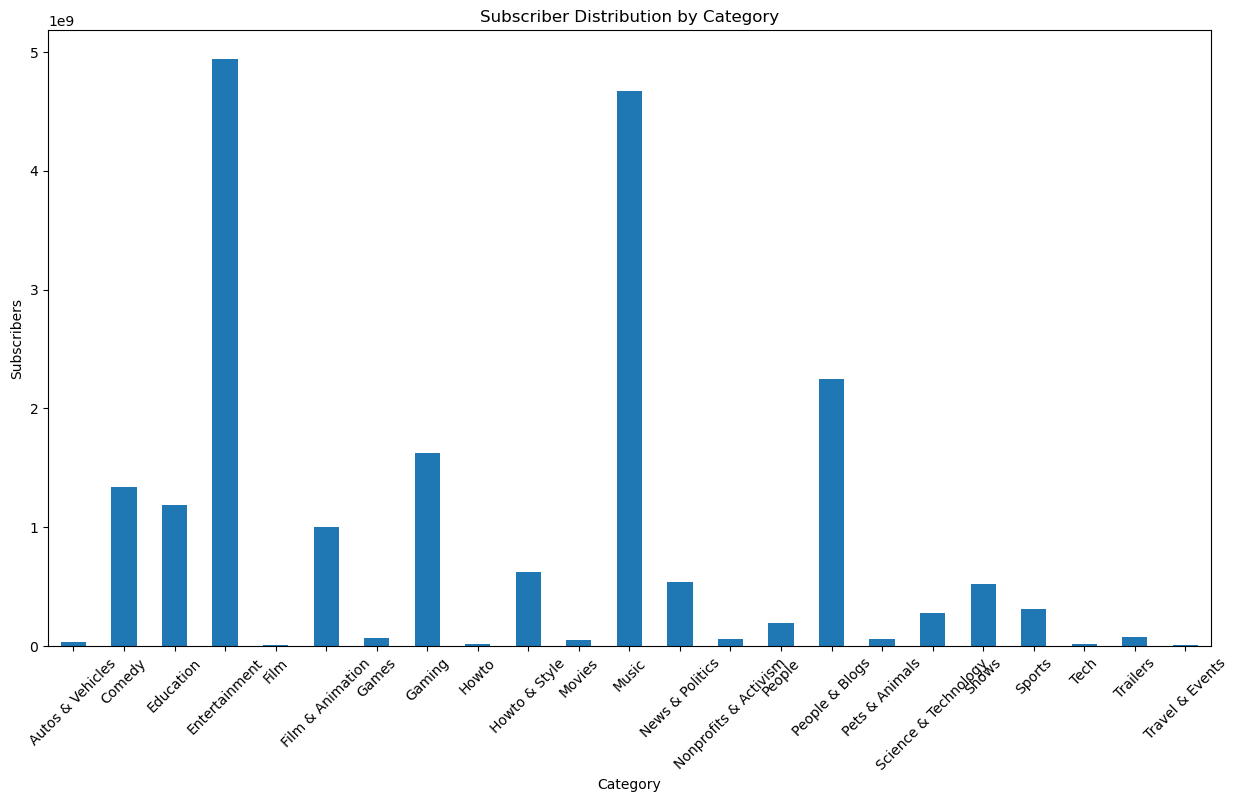

In [19]:
category_subscribers = df.groupby('category')['subscribers'].sum()

# Increase the figure size
plt.figure(figsize=(15, 8))  # Adjust the width (10) and height (6) as needed

category_subscribers.plot(kind='bar')
plt.title('Subscriber Distribution by Category')
plt.ylabel('Subscribers')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


The graph shows that the most popular categories on YouTube are comedy, music, and gaming. These categories are popular because they appeal to a wide range of people. Comedy videos are funny and entertaining, music videos are enjoyable to listen to, and gaming videos are exciting and engaging. The graph shows that comedy, music, and gaming are the most popular categories on YouTube.


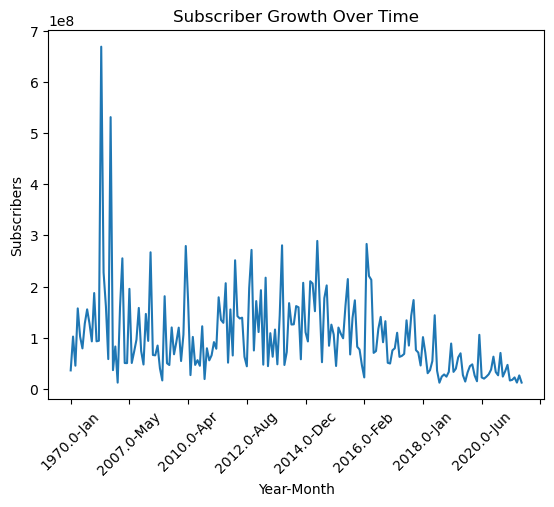

In [20]:
df['created_year_month'] = df['created_year'].astype(str) + '-' + df['created_month'].astype(str)
subscriber_growth = df.groupby('created_year_month')['subscribers'].sum()
subscriber_growth.plot()
plt.title('Subscriber Growth Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show()


The graph shows that the growth rate of YouTube subscribers has been increasing over time. This is likely due to a number of factors, such as the increasing popularity of YouTube, the growing availability of high-speed internet, and the increasing production of high-quality content on YouTube. The graph also shows that the growth rate of YouTube subscribers has been slowing down in recent years. This is likely due to a number of factors, such as the increasing competition from other video platforms, such as TikTok and Twitch, and the increasing saturation of the YouTube market.

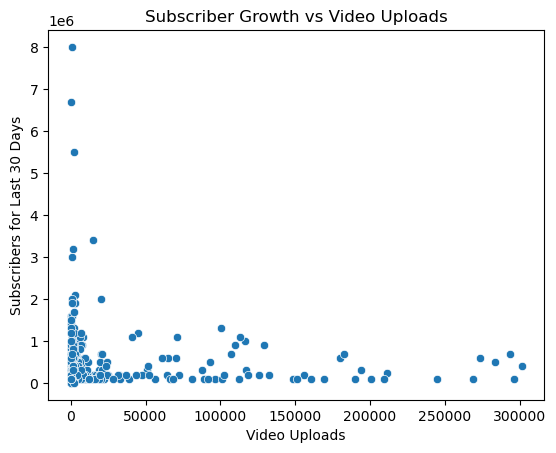

In [22]:
sns.scatterplot(data=df, x='uploads', y='subscribers_for_last_30_days')
plt.xlabel('Video Uploads')
plt.ylabel('Subscribers for Last 30 Days')
plt.title('Subscriber Growth vs Video Uploads')
plt.show()


The graph shows that there is a positive correlation between the number of video uploads and the number of subscribers gained. However, there is a lot of variation in the data, so it is important to consider other factors, such as the quality and timing of the videos, when trying to predict how many subscribers a channel will gain.